In [3]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Overview of Metrics in Recommender Systems

This notebook provides an overview of various metrics used in recommender systems. Recommender systems are algorithms aimed at suggesting relevant items to users. To evaluate the effectiveness of these systems, we use specific metrics that measure the accuracy and quality of recommendations.

In this notebook, we will explore several key metrics commonly used in the field of recommender systems:

- **Similarity Metrics**: These metrics assess how similar users or items are to each other, which is crucial for making relevant recommendations.
- **Predictive Metrics**: These metrics are used to evaluate the accuracy of predicted ratings or preferences compared to actual user responses.
- **Classification Metrics**: In scenarios where recommendations are treated as a binary classification problem (relevant or not relevant).

To illustrate how these metrics work, we will use dummy data representing user interactions (ratings or likes) or attributes of items. The aim is to demonstrate the calculation and interpretation of each metric in the context of recommender systems. We will examine the similarities between items or preferences of users based on these metrics to understand their practical implications in recommending content.

By the end of this notebook, you should have a clear understanding of how these metrics are calculated and how they can be applied to evaluate the performance of recommender systems.


In [4]:
import numpy as np
import pandas as pd
from numpy import dot
from numpy.linalg import norm 

from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.metrics import jaccard_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib_venn import venn2

## Similarity metrics

Similarity metrics can be applied across different types of data, each presenting unique challenges and considerations. From **unary data**, where only a single type of interaction is recorded, to **binary data** that captures two possible states of interaction, and **quantitative data** that offers a nuanced view of preferences through ratings, the landscape of recommender systems is diverse. The suitability of a similarity metric largely depends on the nature of the underlying data and the specific requirements of the recommender system.

### Cosine similarity

Cosine similarity is a measure used to determine the similarity between two non-zero vectors in a vector space. This measure yields a value between -1 and 1, with 1 signifying parallel vectors (or total similarity), -1 denoting vectors in completely divergent directions (or total dissimilarity), and 0 representing perpendicular vectors (indicating no similarity).

**Key aspects:**

__1. Dimensionality Independence:__ Cosine similarity's utility remains intact regardless of the vectors' size. It prioritizes the direction in which the vectors point over their length, rendering it especially relevant for examining datasets with high dimensions or sparsity. In such cases, the orientation of the vectors offers more valuable information than their magnitude.

__2. Advantages with Sparse Data:__ Cosine similarity is effective in scenarios characterized by sparse data, marked by vectors containing numerous zeroes or missing entries. In such cases, the non-zero elements play a crucial role in capturing the meaningful information and similarity between vectors.

__3. Formula:__ It is represented by following formula:


$$ \text{cosine\_similarity}(A, B) = \frac{A \cdot B}{||A|| \cdot ||B||} $$

where:
- $ A $ and $ B $ are two vectors of attributes.
- $ A \cdot B $ is the dot product of the vectors.
- $ \|A\| $ and $ \|B\| $ are the magnitudes (or Euclidean norms) of the vectors.

We can demonstrate the cosine similarity in dummy data:

In [5]:
np.random.seed(69)
# At first we create simple DataFrame, that contains 10 users and 5 items.
# And every user rated every item with value 0-5.

num_users = 10
num_items = 5

ratings_matrix = np.random.choice([0, 1, 2, 3, 4, 5], size=(num_users, num_items))

users = [f'User{i}' for i in range(1, num_users + 1)]
items = [f'Item{i}' for i in range(1, num_items + 1)]

dummy_data = pd.DataFrame(ratings_matrix, index=users, columns=items)
dummy_data.head(10)

,Item1,Item2,Item3,Item4,Item5
User1,3,1,3,2,4
User2,1,1,0,1,0
User3,0,4,5,2,4
User4,3,5,3,0,0
User5,2,3,0,0,1
User6,2,3,4,3,3
User7,5,1,5,4,4
User8,3,5,0,5,0
User9,5,2,3,2,3
User10,2,3,1,2,5


In [6]:
user1_ratings = dummy_data.iloc[0].values.reshape(1, -1) 
user2_ratings = dummy_data.iloc[1].values.reshape(1, -1)

print(f'Cosine similarity between users is: {cosine_similarity(user1_ratings, user2_ratings)[0][0]}')

Cosine similarity between users is: 0.5547001962252291


- Or we can calculate it manually like this:

In [7]:
def cosine_sim(v1, v2):
        return dot(v1, v2) / (norm(v1) * norm(v2))

In [8]:
print(f'Cosine similarity between users is: {cosine_sim(dummy_data.iloc[0].values, dummy_data.iloc[1].values)}')

Cosine similarity between users is: 0.5547001962252291


- The calculated similarity of 0.5547 can be interpreted to mean that the two users have some degree of similarity in their ratings, but they're not exactly alike. 

- In order to visualize the vectors, we will take 2 users and their ratings for 2 items:

In [9]:
vu1 = dummy_data.iloc[0, :2]
vu2 = dummy_data.iloc[1, :2]

print(vu1.head())
vu2.head()

Item1    3
Item2    1
Name: User1, dtype: int64


Item1    1
Item2    1
Name: User2, dtype: int64

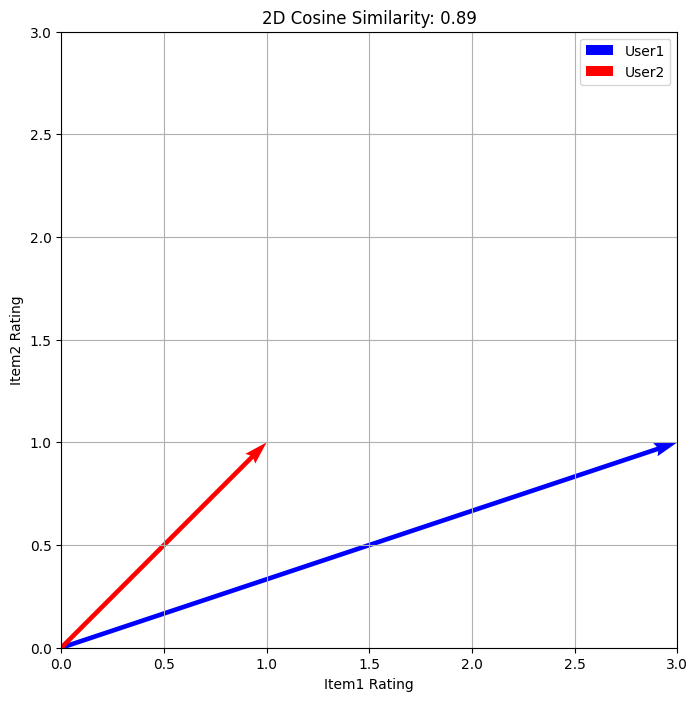

In [10]:
vu1_2d = vu1.values.reshape(1, -1)
vu2_2d = vu2.values.reshape(1, -1)
cosine_similarity_2d = cosine_similarity(vu1_2d, vu2_2d)[0][0]

fig, ax = plt.subplots(figsize=(8, 8))

# Plot the vectors
ax.quiver(0, 0, vu1.iloc[0], vu1.iloc[1], angles='xy', scale_units='xy', scale=1, color='blue', label='User1')
ax.quiver(0, 0, vu2.iloc[0], vu2.iloc[1], angles='xy', scale_units='xy', scale=1, color='red', label='User2')

# Set the labels for the axes
ax.set_xlabel('Item1 Rating')
ax.set_ylabel('Item2 Rating')

ax.legend()
ax.set_aspect('equal')

# Set the limits of the plot
max_limit_2d = np.max([vu1, vu2])
ax.set_xlim([0, max_limit_2d])
ax.set_ylim([0, max_limit_2d])

ax.set_title(f'2D Cosine Similarity: {cosine_similarity_2d:.2f}')

plt.grid(True)
plt.show()

The 2D plot visualizing the ratings of two items by User1 and User2 as vectors, with the plot showing a high cosine similarity of 0.89, indicating that the users’ rating patterns (for 2 items) are quite similar (in context of two items). The closer alignment of the two vectors in the plot underscores their similar preferences for these two items.

## Euclidean distance

Euclidean distance is a common metric used to determine the straight-line distance between two points in a multi-dimensional space, such as a user-centered recommender system. It's akin to using a ruler to measure the shortest path between two points.

The smaller the Euclidean distance, the more similar the two users are in terms of their preferences, as they're 'closer' to each other in the preference space. However, a limitation of this metric is its sensitivity to the scale of measurement. For instance, if User A generally rates items more generously than User B, the Euclidean distance between them might be large despite a strong underlying correlation in their rating patterns. This discrepancy arises because Euclidean distance measures absolute differences without normalizing for users' rating scales.

The formula for Euclidean distance between two points in a 2-dimensional space is given by:

$$ d(\text{Person}_i, \text{Person}_j) = \sqrt{(\text{X}_1 - \text{X}_2)^2 + (\text{Y}_1 - \text{Y}_2)^2} $$

where:
- $ \text{Person}_i $ and $ \text{Person}_j $ represent two different users in the system.
- $ \text{X}_1 $ and $ \text{X}_2 $ are the ratings from $ \text{Person}_i $ and $ \text{Person}_j $ for the same item on one axis (e.g., the rating for Item1).
- $ \text{Y}_1 $ and $ \text{Y}_2 $ are the ratings from $ \text{Person}_i $ and $ \text{Person}_j $ for another item on another axis (e.g., the rating for Item2).

The Euclidean distance can be understood as the length of the hypotenuse of a right-angled triangle formed by the users' ratings on the axes. The lower the Euclidean distance, the more similar the users' preferences are likely to be.

- Now for the same users we calculate Euclidean distance:

In [11]:
print(f'Euclidean distance between users is: {euclidean_distances(user1_ratings, user2_ratings)[0][0]}')

Euclidean distance between users is: 5.477225575051661


- Or we can calculate it manually, like this:

In [12]:
def euc_distances(v1, v2):
    squared_diffs = [(r1 - r2) ** 2 for r1, r2 in zip(v1, v2)]
    
    # Sum the squared differences and take the square root
    distance = sum(squared_diffs) ** 0.5
    return distance

In [13]:
print(f'Euclidean distance between users is : {euc_distances(dummy_data.iloc[0].values, dummy_data.iloc[1].values)}')

Euclidean distance between users is : 5.477225575051661


## Jaccard similarity

Jaccard similarity provides an intuitive and quantifiable metric for comparing two sets. It is determined by the ratio of the number of elements common to both sets (the intersection) to the total number of unique elements present in either set (the union). The value of the Jaccard index varies between 0 and 1, with 0 signifying no shared elements and 1 indicating identical sets.

To compute the Jaccard similarity, one identifies the elements shared between the sets and divides this number by the aggregate count of distinct elements in both sets. This simplicity is one of its key advantages, rendering it a versatile tool in numerous settings:

**1. Comparison of Sets:** Jaccard similarity is valuable for comparing sets by concentrating on whether elements are shared, rather than their particular attributes or order. This is beneficial when element characteristics are secondary, or when processing these characteristics could introduce complexity and reduce efficiency.

**2. Invariance to Scale:** The Jaccard similarity is not influenced by the size of the sets being compared. It is determined solely by the proportion of the shared elements to the overall content, which ensures it is a robust metric for comparing sets of varying sizes.

**3. Binary Data Suitability:** This metric is ideal for binary data representations, where each element is simply marked as present or absent. It is particularly relevant in cases where the existence of certain features is crucial for the comparison.

In recommender systems, Jaccard similarity is adept at identifying users with similar interests and suggesting items that have garnered approval within these user subsets. By leveraging the Jaccard similarity, recommender systems can fine-tune their personalization strategies, facilitating the discovery of items that are likely to align with the preferences of users with comparable patterns.

**4. Formula:** It is represented by following formula:
$$ \text{Jaccard\_similarity}(A, B) = \frac{|A \cap B|}{|A \cup B|} $$

where:
- $ |A \cap B| $ is the number of elements in both sets $ A $ and $ B $.
- $ |A \cup B| $ is the number of elements in either set $ A $ or $ B $.

In [14]:
# Convert the provided binary data to a DataFrame
binary_data = {
    'User1': [1, 1, 0, 0, 1],
    'User2': [1, 0, 1, 1, 0],
    'User3': [0, 1, 1, 0, 0],
    'User4': [1, 1, 0, 1, 1],
    'User5': [0, 0, 1, 0, 1],
}

# We convert the dictionary to a DataFrame and transpose it to get users as rows
binary_df = pd.DataFrame(binary_data).T  # Transpose to get users as rows

binary_df.head()

,0,1,2,3,4
User1,1,1,0,0,1
User2,1,0,1,1,0
User3,0,1,1,0,0
User4,1,1,0,1,1
User5,0,0,1,0,1


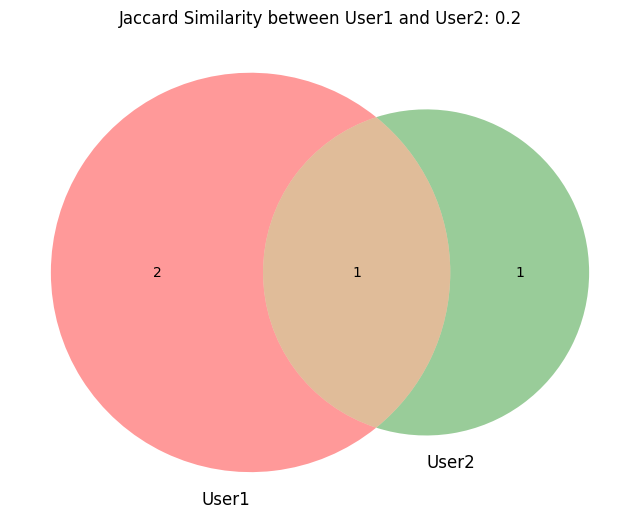

In [15]:
# We assign column names representing items
binary_df.columns = ['Item1', 'Item2', 'Item3', 'Item4', 'Item5']

# Let's take User1 and User2 as an example for the Venn diagram
# Convert binary interactions to set of items for each user
items_user1 = set(binary_df.columns[binary_df.loc['User1'] == 1])
items_user2 = set(binary_df.columns[binary_df.loc['User5'] == 1])

jaccard_sim = jaccard_score(binary_df.loc['User1'], binary_df.loc['User2'])

# Now, let's plot the Venn diagram for User1 and User2
plt.figure(figsize=(8, 8))
venn2([items_user1, items_user2], ('User1', 'User2'))
plt.title(f'Jaccard Similarity between User1 and User2: {jaccard_sim}')
plt.show()

## Pearson correlation coeficient

The Pearson correlation coefficient, also known as Pearson's $ r $, is a statistical metric that quantifies the linear relationship between two continuous variables. It captures how closely data points fit a straight line, reflecting the relationship's strength and direction.

Symbolized as $ r $, the Pearson correlation coefficient ranges from **-1 to 1**, where:

- $ r = 1 $: Indicates a perfect positive correlation. As one variable increases, the other increases in a directly proportional manner, showcasing a strong upward linear trend.
- $ r = -1 $: Signifies a perfect negative correlation. An increase in one variable corresponds with a proportional decrease in the other, indicating a strong downward linear trend.
- $ r = 0 $: Denotes no linear correlation. The variables are independent, with no linear relationship evident.

Utilizing the PCC within recommender systems allows us to predict how one user might rate an item based on the ratings of others. This is typically done by computing a weighted average of ratings from other users, where the weights are determined by the Pearson correlation between their rating vectors.

By implementing PCC, we can offer personalized recommendations by drawing on the collective preferences expressed in user ratings, thus enhancing the system's ability to match users with content that aligns with their tastes.

- **Formula:** It is represented by following formula:

$$ \text{Pearson\_r}(X, Y) = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i - \bar{X})^2}} \sqrt{\sum{(Y_i - \bar{Y})^2}}} $$

where:
- Each $ x_i $ is an individual value from the first variable, and $ \bar{x} $ is the mean of all values from the first variable.
- Same for $ y_i $
- The deviations $ (x_i - \bar{x}) $ and $ (y_i - \bar{y}) $ are the distances of the individual values from their respective means.
- These deviations are multiplied together for each pair of values and then summed up across all pairs.
- $ \sum{(x_i - \bar{x})^2} $ which is the sum of the squared deviations of the first variable's values from their mean, representing its variance.
- Same for $ y_i $
- The square roots of these variances are the standard deviations of each variable.


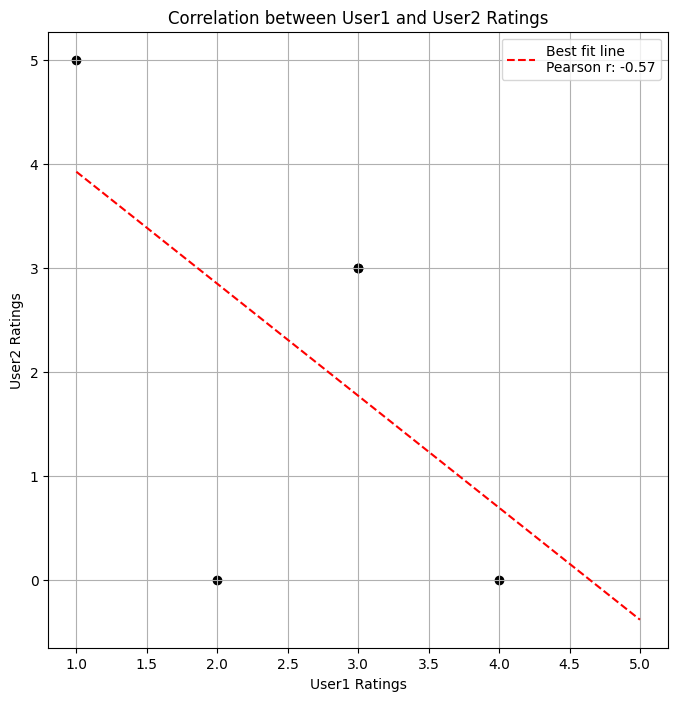

In [16]:
# Calculate the coefficients of the best fit line

ur1 = dummy_data.loc['User1']
ur2 = dummy_data.loc['User4']
pearson_corr = pearsonr(ur1, ur2)

coefficients = np.polyfit(ur1, ur2, 1)
polynomial = np.poly1d(coefficients)

# Generate some x values (corresponding to user1's ratings) and then predict the y values (user2's ratings)
x_axis = np.linspace(min(ur1), max(ur2), 100)
y_axis = polynomial(x_axis)

# Create the plot
plt.figure(figsize=(8, 8))
plt.scatter(ur1, ur2, color='black')  # actual points
plt.plot(x_axis, y_axis, 'r--', label=f'Best fit line\nPearson r: {pearson_corr.statistic:.2f}')  # best fit line

# Add labels and legend
plt.title('Correlation between User1 and User2 Ratings')
plt.xlabel('User1 Ratings')
plt.ylabel('User2 Ratings')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Predictive metrics

Predictive metrics are crucial in evaluating how closely the recommendations made by recommender systems match the actual ratings given by users. The two primary predictive metrics are **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)**, both offering insights into the accuracy of predictions.


## MAE (Mean Absolute Error)

MAE measures the average magnitude of errors between the predicted ratings and the actual user ratings, providing an intuitive metric of prediction accuracy.

$$ \text{MAE} = \frac{1}{|R|} \sum_{\hat{r}_{ui} \in R} |r_{ui} - \hat{r}_{ui}| $$

- $ |R| $ is the number of ratings in the dataset.
- $ r_{ui} $ is the actual rating given by user $ u $ to item $ i $.
- $ \hat{r}_{ui} $ is the predicted rating for user $ u $ and item $ i $.
- The absolute difference $ |r_{ui} - \hat{r}_{ui}| $ indicates the error magnitude without considering the direction of the error.

MAE is particularly useful as it treats all errors equally, providing a holistic view of the prediction accuracy without disproportionately penalizing larger errors.

## RMSE (Root Mean Squared Error)

RMSE extends MAE by squaring the errors before averaging, thus giving a higher weight to larger errors and being especially useful when large errors are particularly undesirable.

$$ \text{RMSE} = \sqrt{\frac{1}{|R|} \sum_{\hat{r}_{ui} \in R} (r_{ui} - \hat{r}_{ui})^2} $$

- The square of the difference $ (r_{ui} - \hat{r}_{ui})^2 $ emphasizes larger errors more than smaller ones.
- The square root transforms the scale of the errors back to the original ratings scale.

Both **RMSE** and **MAE** are typically evaluated for collaborative recommendation models using cross-validation techniques. However, from a business perspective, the lowest **RMSE** or **MAE** isn't the only goal; it's also crucial to consider other scoring metrics, including non-accuracy based ones, which will be discussed later, particularly for tasks with binary recommendations.

In [17]:
np.random.seed(42)

# Generating some 'true' ratings 
num_users = 10
num_items = 5

true_ratings = np.random.randint(1, 6, size=(num_users, num_items))

# Generating some 'predicted' ratings 
predicted_ratings = np.random.randint(1, 6, size=(num_users, num_items))

# Create DataFrames for true and predicted ratings for easy handling
true_ratings_df = pd.DataFrame(true_ratings, index=users, columns=items)
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=users, columns=items)

In [18]:
true_ratings_df.head()

,Item1,Item2,Item3,Item4,Item5
User1,4,5,3,5,5
User2,2,3,3,3,5
User3,4,3,5,2,4
User4,2,4,5,1,4
User5,2,5,4,1,1


In [19]:
predicted_ratings_df.head()

,Item1,Item2,Item3,Item4,Item5
User1,4,4,4,5,3
User2,1,4,2,4,2
User3,2,4,5,2,2
User4,4,2,2,4,4
User5,1,5,5,2,5


In [20]:
# Calculate MAE and RMSE between true and predicted ratings
mae = mean_absolute_error(true_ratings.flatten(), predicted_ratings.flatten())
rmse = np.sqrt(mean_squared_error(true_ratings.flatten(), predicted_ratings.flatten()))

print(f'MAE: {mae}, RMSE: {rmse}')

MAE: 1.58, RMSE: 1.9849433241279208


## Classification metrics


Classification metrics are pivotal for measuring how well a recommender system's decisions align with user preferences. These metrics excel in scenarios where distinguishing between items of interest and those that are not is crucial. While the precise rating is not considered in decision support metrics, it indirectly impacts the evaluation through the order in which items are ranked.

### Decision Support Metrics

When examining the collective recommendations across all users, we can compute traditional metrics such as precision and recall. Items that were either present in the test dataset or received substantial user engagement are acknowledged as correctly predicted. Conversely, the absence of these criteria implies a misprediction. To facilitate these metrics, we annotate our data by classifying a set number of top recommendations (Top-N) into binary categories. Utilizing the `sklearn.metrics` module, a confusion matrix is constructed, which aids in defining our metrics as follows:

|                   | Relevant       | Not Relevant   |
|-------------------|----------------|----------------|
| Recommended top k | True Positive (TP) | False Positive (FP) |
| Not recommended   | False Negative (FN) | True Negative (TN) |

*Confusion matrix layout used for evaluating recommendation results.*


For illustration purpose, a dummy data set is created for demonstrating how different evaluation metrics work.

The data has the schema that can be frequently found in a recommendation problem, that is, each row in the dataset is a (user, item, rating) tuple, where "rating" can be an ordinal rating score (e.g., discrete integers of 1, 2, 3, etc.) or an numerical float number that quantitatively indicates the preference of the user towards that item.

For simplicity reason, the column of rating in the dummy dataset we use in the example represent some ordinal ratings.

In [21]:
COL_USER = "UserId"
COL_ITEM = "MovieId"
COL_RATING = "Rating"
COL_PREDICTION = "Rating"

df_true = pd.DataFrame(
        {
            COL_USER: [1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
            COL_ITEM: [1, 2, 3, 1, 4, 5, 6, 7, 2, 5, 6, 8, 9, 10, 11, 12, 13, 14],
            COL_RATING: [5, 4, 3, 5, 5, 3, 3, 1, 5, 5, 5, 4, 4, 3, 3, 3, 2, 1],
        }
    )
df_pred = pd.DataFrame(
    {
        COL_USER: [1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        COL_ITEM: [3, 10, 12, 10, 3, 5, 11, 13, 4, 10, 7, 13, 1, 3, 5, 2, 11, 14],
        COL_PREDICTION: [14, 13, 12, 14, 13, 12, 11, 10, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5]
    }
)

k = 3

### Application Scenarios

Ranking metrics are pivotal when the effectiveness of hits and/or the ranking of items is assessed:

- **Hit:** Determined by relevance, a hit signifies whether the "k" recommended items match the user's relevant items. For instance, a hit could be a click, view, or purchase by a user. Successful hits in the recommended items reflect well on the recommender's performance. Metrics such as "precision," "recall," etc., gauge the accuracy of these hits.
  
- **Ranking:** Ranking metrics offer deeper insights into the hits by considering user preferences for the order of the hit items. Metrics like "mean average precision," "ndcg," etc., assess whether relevant items are positioned above less relevant or irrelevant ones in the ranking.

### Determining Recommendation Relevance

The relevance of a recommendation can be quantified through several methods:

- **By Ranking:** Here, the relevant items are those that appear at the top of the ranked recommendations list, i.e., the top k items as determined by predicted ratings or other scores reflecting a user's preference.

- **By Timestamp:** Relevance is attributed to the most recently viewed k items, ranked according to the timestamps.

- **By Rating:** An item's relevance is defined by its rating or other score indicating a user's preference, with relevance granted to items surpassing a predefined threshold.


### Precision@k

The `Precision@k` metric is used to evaluate the performance of a recommendation system based on the relevancy of the items within the top `k` recommendations given to a user. It specifically measures the proportion of recommended items that are relevant to the user among the top `k` items, where relevancy (in our simple example) is determined based on the rating score. A relevant item is typically one that has a rating above a certain threshold, indicating that the user has a preference for that item.

In the provided function `calculate_precision_at_k`, the Precision@k is calculated as follows:

- It first identifies the top `k` predicted items for each user by sorting the predictions based on their associated rating scores.
- It then checks how many of these top `k` items are present in the ground truth data, which contains the actual items the users have rated and deemed relevant.
- The precision for each user is calculated by dividing the number of relevant items found in the top `k` predictions by `k`.
- Finally, the overall precision across all users is computed by taking the average of the individual users' precision scores.
- It is calculated by following formula:

$$ P = \frac{\text{ K of our recommendations that are relevant}}{\text{ K of items we recommended}} $$


In [22]:
def calculate_precision_at_k(df_true, df_pred, k):
    # Get Top-k predictions for every user (based on ratings).
    top_k_pred = df_pred.groupby(COL_USER).apply(lambda x: x.nlargest(k, COL_PREDICTION)).reset_index(drop=True)

    # Find out how many of Top-k items are in true ratings.
    hits = pd.merge(top_k_pred, df_true, on=[COL_USER, COL_ITEM], how='inner')
    hits_per_user = hits.groupby(COL_USER).size()
    
    # Calculate precision for each user. 
    precision_per_user = hits_per_user / k
    
    # Overall precision@k.
    overall_precision = precision_per_user.mean()
    
    return overall_precision


overall_precision_at_k = calculate_precision_at_k(df_true, df_pred, k)

print(f"Overall Precision@{k}: {overall_precision_at_k}")

Overall Precision@3: 0.3333333333333333


Example output shows an overall Precision@k of 0.3333, indicating that, on average, one-third of the top `k` recommended items were relevant to the users in terms of their actual ratings.

### Recall@k or HitRatio@k

Recall@k is an important metric in the context of recommendation systems, measuring the ratio of relevant items found in the top k predictions to the total number of relevant items. This metric provides insight into how many of the items that should have been recommended were actually recommended by the system at the top k positions.

In the `calculate_recall_at_k` function, the Recall@k is computed as follows:

- For each user, the function starts by predicting the top k items. These are the items that the recommendation model believes the user will rate highly.
- It then intersects these predicted top k items with the actual items that the user has rated highly (the ground truth), determining the number of hits (i.e., correct predictions).
- The user-specific recall is calculated by dividing the number of hits by the total number of items that the user has actually rated highly.
- Finally, to get the overall performance across all users, the function averages these individual recall - It is calculated by following formula:

$$ r = \frac{\text{K of our recommendations that are relevant}}{\text{K of all the possible relevant items}} $$al ratings.


In [23]:
def calculate_recall_at_k(df_true, df_pred, k):
    # Get Top-k predictions for every user (based on ratings).
    top_k_pred = df_pred.groupby(COL_USER).apply(lambda x: x.nlargest(k, COL_PREDICTION)).reset_index(drop=True)
                                                                                                     
    # Count the total number of relevant items per user in the ground truth data                                                        
    relevant_items_per_user = df_true.groupby(COL_USER)[COL_ITEM].count()
    
    # Find the intersection of top k predictions with the ground truth, which are the hits
    hits = pd.merge(top_k_pred, df_true, on=[COL_USER, COL_ITEM], how='inner')

    # Count the number of hits per user
    hits_per_user = hits.groupby(COL_USER).size()
    
    # Calculate recall for each user by dividing the number of hits by the total number of relevant items
    recall_per_user = hits_per_user / relevant_items_per_user
    
    # Calculate the overall average recall across all users
    overall_recall = recall_per_user.mean()
    
    return overall_recall

overall_recall_at_k = calculate_recall_at_k(df_true, df_pred, k)
print(f"Overall Precision@{k}: {overall_recall_at_k}")

Overall Precision@3: 0.2111111111111111


The example output indicates an overall Recall@k of approximately 0.2111, meaning that around 21% of the relevant items were captured in the top k recommendations across all users.

### F1@k


The F1@k score is a statistical measure used to evaluate the precision and recall balance of a recommendation system's predictions at a cutoff of top k items. It is the harmonic mean of the precision and recall, providing a single metric that balances both concerns — useful when seeking to understand the overall accuracy of the top k predictions.

The function `calculate_f1_at_k` calculates the F1@k score in the following manner:

- The function first checks if the sum of the overall precision and recall is greater than zero to avoid division by zero in the F1 score calculation.
- If the sum is positive, it computes the F1 score using the harmonic mean formula:
  \[
  F1@k = 2 \times \left( \frac{overall\_precision \times overall\_recall}{overall\_precision + overall\_recall} \right)
  \]
  which balances both precision and recall metrics.
- If the sum of precision and recall is zero, indicating that there are no positive predictions or relevant items, the F1 score is set to zero.

This measure is critical in systems where false positives and false negatives have similar costs, and it provides a more robust evaluation compared to using precision or recall alone.

In the provided output, the F1@k score is calculated to be approximately 0.258, indicating the system's balanced performance between precision and recall for the top k recommendations.


In [24]:
def calculate_f1_at_k(overall_precision, overall_recall):
    # Check if the sum of overall precision and recall is greater than zero
    # to avoid division by zero in the F1 score calculation
    if overall_precision + overall_recall > 0:
        # If so, calculate the F1 score using the harmonic mean of precision and recall,
        # which is 2 * (precision * recall) / (precision + recall)
        overall_f1 = 2 * (overall_precision * overall_recall) / (overall_precision + overall_recall)
    else:
        # If the sum of precision and recall is zero, set the F1 score to zero,
        # as there are no positive predictions and/or relevant items
        overall_f1 = 0
        
    return overall_f1

overall_f1_at_k = calculate_f1_at_k(overall_precision_at_k, overall_recall_at_k)
print(f'Overall F1@{k}: {overall_f1_at_k}')

Overall F1@3: 0.2585034013605442
